<a href="https://colab.research.google.com/github/jsdysw/face-GAN/blob/master/face-gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!rm -R img_align_celeba/.ipynb_checkpoints
!ls img_align_celeba/ -a   #to make sure that the deletion has occurred

rm: cannot remove 'img_align_celeba/.ipynb_checkpoints': No such file or directory
.  ..  img_align_celeba


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

from PIL import Image
from IPython.display import display
import cv2


import glob
import os
import random
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(42)

In [38]:
# Let's define the path
data_dir = 'img_align_celeba/'
# data_dir = '../input/celeba-dataset/img_align_celeba/'

In [39]:
# defining the image transform rules
'''
The augmentions are as follows, 
1. Resizing the image to 32x32 as the smaller the image the faster we can train 
2. Cropping from center with 32x32
3. Chagning type to tensor
we won't be using normalize here as we will have to do that manually later for tanh activation function
'''

transform_img = transforms.Compose([
        transforms.Resize(32),  
        transforms.CenterCrop(32),
        transforms.ToTensor()
    ])

In [40]:
def get_dataloader(batch_size, data_dir, transforms):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param data_dir: Directory where image data is located
    :param transforms: data augmentations
    :return: DataLoader with batched data
    """
    
    ds = datasets.ImageFolder(data_dir, transform_img)
    data_loader = torch.utils.data.DataLoader(ds, batch_size=batch_size,num_workers= 4, shuffle=True)

    return data_loader

In [41]:
batch_size = 32 # Instead of individual samples, the data loader produces batched samples of given number
train_loader = get_dataloader(batch_size,data_dir, transform_img)

In [42]:
print(len(train_loader.dataset))


100


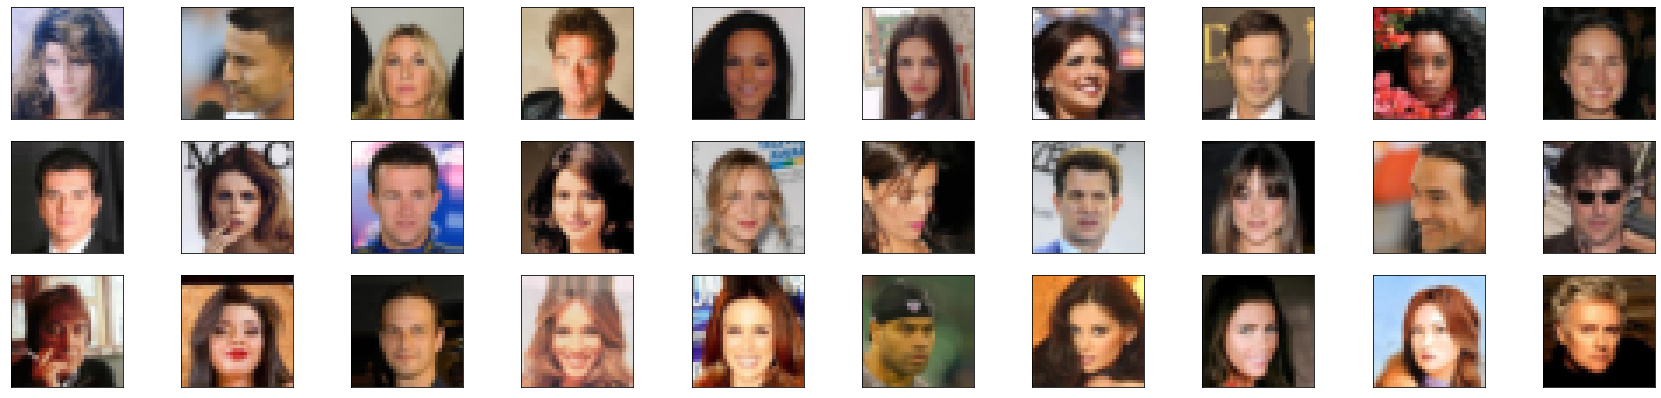

In [43]:
# Let's see if the train loader is working and sending us iterable images :) 
# Also note that we converted images to tensor above with ToTensor(). Now we need to convert back to numpy to plot them

# obtain one batch of training images which means 32 images
dataiter = iter(train_loader)
img, _ = dataiter.next() # _ for labels, Dataloader sends labels automatically as defined in Dataloader class.
#However we don't need labels neither we assigned one :p so we put _ 
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(30, 7))
plot_size=30 # gonna plot 30 images only
for idx in np.arange(plot_size):
    ax = fig.add_subplot(3, plot_size/3, idx+1, xticks=[], yticks=[])
    npimg = img[idx].numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [44]:
def scale_images(x, max = 1.00 , min = -1.00):
    x = x * (max - min) + min
    return x

In [45]:
#let's check the scaling
img = img[5]
print('Before scaling min: ', img.min())
print('Before scaling max: ', img.max())

scaled_img = scale_images(img)

print('After Scaling Min: ', scaled_img.min())
print('After Scaling Max: ', scaled_img.max())

Before scaling min:  tensor(0.0471)
Before scaling max:  tensor(1.)
After Scaling Min:  tensor(-0.9059)
After Scaling Max:  tensor(1.)
